# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

Business Context
Business Objective
Data Objective
Evaluation

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [243]:
#Imports:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
df_sat_2017 = pd.read_csv('../data/sat_2017.csv')
df_act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
df_sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
df_sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [5]:
df_act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [6]:
df_act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

1. No null/missing values from both datasets.

2. Participation rates need to be converted to integer data type for both datasets.

3. For the SAT dataset, the minimum value for the Math column is 52, while the mean is 547. This seems to indicate an outlier,  further investigation is required.

4. For the ACT dataset, the Composite column needs to be converted to a float data type.

5. For the ACT dataset, the minimum value for the Science column is 2.3, while the mean is 21. This seems to indicate an outlier, further investigation is required.

In [7]:
#### 4a. Does the data look complete? 
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


In [8]:
df_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.3+ KB


Both datasets appear to be complete. However, we need to investigate outliers in both datasets, validating them against their respective source. Also, we need to determine why the Composite score (from ACT dataset), is not loaded as a float data type.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

For SAT, both EBRW and Math tests have minimum/maximum possible values of 200/800. For ACT, the 4 subject area and composite scores have a minimum/maximum possible values of 0/36.

For the SAT dataset, this indicates that the outlier Math score of 52 is an error as the minimum score is 200.

Validating the SAT dataset against its source, shows that the Math score for the state of Maryland should be 524 instead of 52.


In [3]:
# Validate SAT CSV data with data from source @ https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/

# Set index (State) and rename columns of SAT CSV and source dataframes to facilitate validation later.

sat_2017_columns = ['Participation', 'EBRW', 'Math', 'Total']

df_sat_2017.set_index('State', inplace=True)
df_sat_2017.columns = sat_2017_columns

In [4]:
# Load source SAT data from tab delimited file into dataframe.
df_sat_2017_source = pd.read_csv('../data/sat_2017_source.txt', sep='\t')
df_sat_2017_source.set_index('State', inplace=True)
df_sat_2017_source.columns = sat_2017_columns
df_sat_2017_source.rename(columns=lambda col_name: col_name + '_src', inplace=True) 

# Join SAT CSV and source dataframes on row index 'State' 
df_sat_2017_combined = df_sat_2017.join(df_sat_2017_source, 'State')


# Compares the CSV and source columns and returns a list of State index values of rows with mismatched columns
def get_mismatched_indexes(df_combined, columns):
    
    mismatched_indexes = []
    
    for column in columns:

        rows = df_combined[df_combined[column] != df_combined[column + '_src']]
        
        if len(rows) > 0:
            mismatched_indexes.extend(rows.index.values)
        
    return list(set(mismatched_indexes))


df_sat_2017_mismatched = df_sat_2017_combined.loc[get_mismatched_indexes(df_sat_2017_combined, sat_2017_columns)]

# Highlight a mismatch between a CSV and source column value
def highlight_mismatched(column):
    
    formats = ['' for i in range(column.size)]
    
    if column.name in sat_2017_columns:
        
        is_mismatched = column != df_sat_2017_mismatched[column.name + '_src']

        return ['background-color: yellow' if mismatched else '' for mismatched in is_mismatched]
    
    return formats

df_sat_2017_mismatched.style.apply(highlight_mismatched)

,Participation,EBRW,Math,Total,Participation_src,EBRW_src,Math_src,Total_src
State,,,,,,,,
Maryland,69%,536,52,1060,69%,536,524,1060


Before we can validate the ACT CSV dataset against its source, we must ensure that the columns from the CSV dataset and the corresponding column from the source have the same data type.

Specifically, the Composite column of the CSV dataset should have been loaded as float values instead of strings. Doing a check on Composite score column, reveals an error in the composite score of the state of Wyoming.

We have to fix this error before we can validate the CSV dataset against its source.

In [5]:
# Validate ACT CSV data with data from source @ https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows

# Set index (State) and rename columns of ACT CSV and source dataframes to facilitate validation later.

act_2017_columns = ['Participation', 'English', 'Math', 'Reading', 'Science', 'Composite']

df_act_2017.set_index('State', inplace=True)
df_act_2017.columns = act_2017_columns


def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def highlight_NaN_value(column):
    
    formats = ['' for i in range(column.size)]
    
    if column.name == 'Composite':
        return ['background-color: yellow' if not is_float(value) else '' for value in column]
    
    return formats

df_act_2017['is_composite_float'] = df_act_2017.apply(lambda row: is_float(row['Composite']), axis=1)
df_act_2017.tail().style.apply(highlight_NaN_value)

,Participation,English,Math,Reading,Science,Composite,is_composite_float
State,,,,,,,
Virginia,29%,23.5,23.3,24.6,23.5,23.8,True
Washington,29%,20.9,21.9,22.1,22,21.9,True
West Virginia,69%,20,19.4,21.2,20.5,20.4,True
Wisconsin,100%,19.7,20.4,20.6,20.9,20.5,True
Wyoming,100%,19.4,19.8,20.8,20.6,20.2x,False


To fix this error, we change the Composite score of Wyoming to a numeric string (20.2) and convert the entire Composite score columnn to float values.


In [6]:
df_act_2017.loc['Wyoming','Composite'] = 20.2

df_act_2017['Composite'] = df_act_2017.apply(lambda row: float(row['Composite']), axis=1)

df_act_2017.drop('is_composite_float', axis=1, inplace=True)

df_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, National to Wyoming
Data columns (total 6 columns):
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(1)
memory usage: 3.9+ KB


Now we can validate the ACT CSV dataset against its source, and address any errors found.


In [7]:
# Load source SAT data from tab delimited file into dataframe.
df_act_2017_source = pd.read_csv('../data/act_2017_source.txt', sep='\t')
df_act_2017_source.set_index('State', inplace=True)
df_act_2017_source.columns = act_2017_columns
df_act_2017_source.rename(columns=lambda col_name: col_name + '_src', inplace=True) 

# Join ACT CSV and source dataframes on row index 'State' 
df_act_2017_combined = df_act_2017.join(df_act_2017_source, 'State')

df_act_2017_mismatched = df_act_2017_combined.loc[get_mismatched_indexes(df_act_2017_combined, act_2017_columns)]

def highlight_act_mismatched(column):
    
    formats = ['' for i in range(column.size)]
    
    if column.name in act_2017_columns:
        
        is_mismatched = column != df_act_2017_mismatched[column.name + '_src']

        return ['background-color: yellow' if mismatched else '' for mismatched in is_mismatched]
    
    return formats

df_act_2017_mismatched.style.apply(highlight_act_mismatched)

,Participation,English,Math,Reading,Science,Composite,Participation_src,English_src,Math_src,Reading_src,Science_src,Composite_src
State,,,,,,,,,,,,
Maryland,28%,23.3,23.1,24.2,2.3,23.6,28%,23.3,23.1,24.2,23.2,23.6
National,60%,20.3,20.7,21.4,21,21,60%,20.3,20.7,21.4,21,21


Cross-referencing the ACT source, we found 2 errors:
1. The Science score of Maryland should have been 23.2
2. The national Participation rate differs from the source due to a leading whitespace. This error will be resolved when converting the Participation column from string to int values.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

For the SAT dataset, we need to correct the Math score of Maryland to 524.
For the ACT dataset, we need to correct the Science score of Maryland to 23.2.
For both datasets, we need to convert Particatpation columns from string to float values.


In [8]:
def highlight_math_column(column):
    
    if column.name == 'Math':
        return ['background-color: yellow']
    else:
        return ['']

df_sat_2017.loc['Maryland','Math'] = 524
df_sat_2017.loc[['Maryland']].style.apply(highlight_math_column)

,Participation,EBRW,Math,Total
State,,,,
Maryland,69%,536,524,1060


In [10]:
def highlight_science_column(column):
    
    if column.name == 'Science':
        return ['background-color: yellow']
    else:
        return ['']

df_act_2017.loc['Maryland','Science'] = 23.2
df_act_2017.loc[['Maryland']].style.apply(highlight_science_column)

,Participation,English,Math,Reading,Science,Composite
State,,,,,,
Maryland,28%,23.3,23.1,24.2,23.2,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
Participation    51 non-null object
EBRW             51 non-null int64
Math             51 non-null int64
Total            51 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.1+ KB


In [17]:
df_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, National to Wyoming
Data columns (total 6 columns):
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(1)
memory usage: 3.9+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

The Participation column (from both datasets) should be of integer data type to reflect percentages of state participation rates.

Note: The Composite score column from the ACT dataset was converted from string to float data type earlier to facilitate validation against its source.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
# Convert Participation columns of both datasets from string to integer data type.

def to_int_column(df, col_name):
    df[col_name] = df.apply(lambda row: int(row[col_name].strip()[:-1]), axis=1)

to_int_column(df_sat_2017, 'Participation')
to_int_column(df_act_2017, 'Participation')

- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [19]:
#code

- Display the data types again to confirm they are correct.

In [20]:
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
Participation    51 non-null int64
EBRW             51 non-null int64
Math             51 non-null int64
Total            51 non-null int64
dtypes: int64(4)
memory usage: 3.3+ KB


In [21]:
df_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, National to Wyoming
Data columns (total 6 columns):
Participation    52 non-null int64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1)
memory usage: 4.1+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [10]:
# Rename index and column names to lowercase. Append pfrefix 'sat_' or 'act_' to the respective datasets.  
sat_columns = ['sat_participation', 'sat_ebrw', 'sat_math', 'sat_total']
act_columns = ['act_participation', 'act_english', 'act_math', 'act_reading', 'act_science', 'act_composite']

df_sat_2017.index.name = 'state'
df_sat_2017.columns = sat_columns

df_act_2017.index.name = 'state'
df_act_2017.columns = act_columns

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state (index)|str|SAT/ACT|State of the test data.| 
|year (index)|int|SAT/ACT|Year of the test data.| 
|sat_participation|int|SAT|Percentage of students in the state taking the SAT college admissions test.| 
|sat_ebrw|int|SAT|Evidence-Based Reading Writing score of the SAT test.| 
|sat_math|int|SAT|Math score of the SAT test.| 
|sat_total|int|SAT|Total score of the SAT test (EBRW + Math score).| 
|act_participation|int|ACT|Percentage of students in the state taking the ACT college admissions test.| 
|act_english|float|ACT|English score of the ACT test.| 
|act_math|float|ACT|Math score of the ACT test.| 
|act_reading|float|ACT|Reading score of the ACT test.| 
|act_science|float|ACT|Science score of the ACT test.| 
|act_composite|float|ACT|Composite score of the ACT test.| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

The ACT dataset contains a row with index 'National'. It has score averages of the different columns across all the states. We do not need this row and will drop it.

In [11]:
df_act_2017.loc[['National']]

df_act_2017.drop('National', inplace=True)

After removing the extra row, both SAT and ACT datasets have the same number of rows and we cna proceed to join them,

In [14]:
df_act_2017.info()
print('\n')
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 6 columns):
act_participation    51 non-null int64
act_english          51 non-null float64
act_math             51 non-null float64
act_reading          51 non-null float64
act_science          51 non-null float64
act_composite        51 non-null float64
dtypes: float64(5), int64(1)
memory usage: 2.6+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
sat_participation    51 non-null int64
sat_ebrw             51 non-null int64
sat_math             51 non-null int64
sat_total            51 non-null int64
dtypes: int64(4)
memory usage: 3.3+ KB


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [12]:
# Merge the 2017 SAT and ACT dataframes using the 'state' index
df_combined_2017 = df_sat_2017.merge(df_act_2017, how='inner', left_index=True, right_index=True)

# Create a Year column to indicate the year of the datasets 
df_combined_2017['year'] = 2017

df_combined_2017.head(10)

,sat_participation,sat_ebrw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite,year
state,,,,,,,,,,,
Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,2017
Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,2017
Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,2017
Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,2017
California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,2017
Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,2017
Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,2017
Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,2017
District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,2017


In [26]:
df_combined_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 11 columns):
sat_participation    51 non-null int64
sat_ebrw             51 non-null int64
sat_math             51 non-null int64
sat_total            51 non-null int64
act_participation    51 non-null int64
act_english          51 non-null float64
act_math             51 non-null float64
act_reading          51 non-null float64
act_science          51 non-null float64
act_composite        51 non-null float64
year                 51 non-null int64
dtypes: float64(5), int64(6)
memory usage: 6.1+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [13]:
df_combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [193]:
# Load 2018 SAT and ACT CSV datasets into dataframes

df_sat_2018 = pd.read_csv('../data/sat_2018.csv')
df_act_2018 = pd.read_csv('../data/act_2018_updated.csv')

df_sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [194]:
# Rename columns and set index to state to facilitate validation and merging of dataframes later

sat_columns = ['state', 'sat_participation', 'sat_ebrw', 'sat_math', 'sat_total']

df_sat_2018.columns = sat_columns
df_sat_2018.set_index('state', inplace=True)

df_sat_2018.describe()

,sat_ebrw,sat_math,sat_total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [30]:
df_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
sat_participation    51 non-null object
sat_ebrw             51 non-null int64
sat_math             51 non-null int64
sat_total            51 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


In [195]:
# Verify that sum of EBRW and Math scores equals Total score
df_sat_2018['sat_total_chk'] = df_sat_2018['sat_ebrw'] + df_sat_2018['sat_math']

df_sat_2018_mismatched = df_sat_2018[(df_sat_2018['sat_total'] != df_sat_2018['sat_total_chk'])]

df_sat_2018_mismatched

,sat_participation,sat_ebrw,sat_math,sat_total,sat_total_chk
state,,,,,
Arkansas,5%,592,576,1169,1168
Connecticut,100%,535,519,1053,1054
Delaware,100%,505,492,998,997
Kansas,4%,633,631,1265,1264
Michigan,100%,511,499,1011,1010
New Mexico,16%,552,540,1093,1092
North Carolina,52%,554,543,1098,1097
Vermont,64%,565,554,1120,1119
Wyoming,3%,633,625,1257,1258


For the 2018 SAT dataset:
1. Dataset is complete, no missing/null values
2. Both EBRW and Math score columns are within minimum/maximum possible values.
3. Participation column needs to be converted to integer data type.
4. There are some errors in the total score column.

In [196]:
# Convert Participation column from string to integer data type
to_int_column(df_sat_2018, 'sat_participation')

# Drop the column for checking the total score
df_sat_2018.drop('sat_total_chk', axis=1, inplace=True)

df_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
sat_participation    51 non-null int64
sat_ebrw             51 non-null int64
sat_math             51 non-null int64
sat_total            51 non-null int64
dtypes: int64(4)
memory usage: 1.8+ KB


In [33]:
df_act_2018.head(10)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


In [197]:
# Rename columns and set index to state to facilitate validation and merging of dataframes later

act_columns = ['state', 'act_participation', 'act_composite', 'act_english', 'act_math', 'act_reading', 'act_science']

df_act_2018.columns = act_columns
df_act_2018.set_index('state', inplace=True)

df_act_2018.describe()

,act_participation,act_composite,act_english,act_math,act_reading,act_science
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [35]:
df_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 6 columns):
act_participation    51 non-null int64
act_composite        51 non-null float64
act_english          51 non-null float64
act_math             51 non-null float64
act_reading          51 non-null float64
act_science          51 non-null float64
dtypes: float64(5), int64(1)
memory usage: 2.6+ KB


For the 2018 ACT dataset:
1. Dataset is complete, no missing/null values
2. Composite, English, Math, Reading and Science score columns are within minimum/maximum possible values.
3. Participation rate is already in integer data type.
4. Ordering of Composite score column differs from the 2017 dataset.

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [198]:
# Merge the 2018 SAT and ACT dataframes using the 'state' index
df_combined_2018 = df_sat_2018.merge(df_act_2018, how='inner', left_index=True, right_index=True)

# Create a Year column to indicate the year of the datasets 
df_combined_2018['year'] = 2018

df_combined_2018.head(10)

,sat_participation,sat_ebrw,sat_math,sat_total,act_participation,act_composite,act_english,act_math,act_reading,act_science,year
state,,,,,,,,,,,
Alabama,6,595,571,1166,100,19.1,18.9,18.3,19.6,19.0,2018
Alaska,43,562,544,1106,33,20.8,19.8,20.6,21.6,20.7,2018
Arizona,29,577,572,1149,66,19.2,18.2,19.4,19.5,19.2,2018
Arkansas,5,592,576,1169,100,19.4,19.1,18.9,19.7,19.4,2018
California,60,540,536,1076,27,22.7,22.5,22.5,23.0,22.1,2018
Colorado,100,519,506,1025,30,23.9,23.9,23.2,24.4,23.5,2018
Connecticut,100,535,519,1053,26,25.6,26.0,24.8,26.1,24.9,2018
Delaware,100,505,492,998,17,23.2,23.7,23.1,24.5,23.4,2018
District of Columbia,92,497,480,977,32,23.6,23.7,22.7,24.4,23.0,2018


In [199]:
df_combined_2018.reset_index(inplace=True)

df_combined_2018.set_index(['state', 'year'], inplace=True)
df_combined_2018.head()

,,sat_participation,sat_ebrw,sat_math,sat_total,act_participation,act_composite,act_english,act_math,act_reading,act_science
state,year,,,,,,,,,,
Alabama,2018,6,595,571,1166,100,19.1,18.9,18.3,19.6,19.0
Alaska,2018,43,562,544,1106,33,20.8,19.8,20.6,21.6,20.7
Arizona,2018,29,577,572,1149,66,19.2,18.2,19.4,19.5,19.2
Arkansas,2018,5,592,576,1169,100,19.4,19.1,18.9,19.7,19.4
California,2018,60,540,536,1076,27,22.7,22.5,22.5,23.0,22.1


In [200]:
# Load 2017 SAT and ACT combined CSV dataset into dataframes

df_combined_2017 = pd.read_csv('../data/combined_2017.csv')

df_combined_2017.set_index(['state', 'year'], inplace=True)

df_combined_2017.head(10)

,,sat_participation,sat_ebrw,sat_math,sat_total,act_participation,act_english,act_math,act_reading,act_science,act_composite
state,year,,,,,,,,,,
Alabama,2017,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
Alaska,2017,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
Arizona,2017,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
Arkansas,2017,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
California,2017,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8
Colorado,2017,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8
Connecticut,2017,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2
Delaware,2017,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1
District of Columbia,2017,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2


In [201]:
df_combined = pd.concat([df_combined_2018, df_combined_2017], sort=True)

df_combined.to_csv('../data/combined_2017_2018.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [45]:
df_combined_describe_T = df_combined.describe().T

df_combined_describe_T

,count,mean,std,min,25%,50%,75%,max
act_composite,102.0,21.502941,2.053756,17.7,19.825,21.35,23.600,25.6
act_english,102.0,20.959804,2.388722,16.3,19.025,20.50,23.375,26.0
act_math,102.0,21.153922,1.999291,17.8,19.400,20.90,23.100,25.3
act_participation,102.0,63.450980,33.010538,7.0,31.000,66.50,100.000,100.0
act_reading,102.0,22.014706,2.107337,18.0,20.425,21.65,24.175,26.1
act_science,102.0,21.193137,2.601647,2.3,19.900,21.20,23.075,24.9
sat_ebrw,102.0,566.401961,46.442823,480.0,534.250,554.50,613.500,644.0
sat_math,102.0,556.558824,47.213770,468.0,523.000,545.50,595.000,655.0
sat_participation,102.0,42.774510,36.252663,2.0,4.000,45.50,70.000,100.0
sat_total,102.0,1123.058824,92.915678,950.0,1055.250,1099.00,1209.500,1298.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [25]:
def get_standard_deviation(values):
    
    sum_sq_diff_mean = 0
    
    mean = np.mean(values)
    
    for value in values:
        sum_sq_diff_mean += (value - mean)**2
        
    return np.sqrt(sum_sq_diff_mean /  len(values))

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [49]:
# Create dictionary comprehensions for the standard deviations on numeric columns
my_std_devs = {col_name : get_standard_deviation(df_combined[col_name]) for col_name in df_combined.columns}
np_std_devs = {col_name : np.std(df_combined[col_name]) for col_name in df_combined.columns}


df_my_std_devs = pd.DataFrame.from_dict(my_std_devs, orient='index')
df_np_std_devs= pd.DataFrame.from_dict(np_std_devs, orient='index')

df_dp_std = df_combined_describe_T[['std']]

df_std_devs = df_my_std_devs.merge(df_np_std_devs, left_index=True, right_index=True)
df_std_devs = df_std_devs.merge(df_dp_std, left_index=True, right_index=True)

df_std_devs.columns = ['My SD', 'NP SD', 'PD SD']

df_std_devs

,My SD,NP SD,PD SD
act_composite,2.043663,2.043663,2.053756
act_english,2.376984,2.376984,2.388722
act_math,1.989466,1.989466,1.999291
act_participation,32.848323,32.848323,33.010538
act_reading,2.096982,2.096982,2.107337
act_science,2.588862,2.588862,2.601647
sat_ebrw,46.214602,46.214602,46.442823
sat_math,46.981760,46.981760,47.213770
sat_participation,36.074516,36.074516,36.252663
sat_total,92.459087,92.459087,92.915678


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

The manually calculated standard deviations matches the numpy's std method but NOT the pandas describe.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [94]:
idx = pd.IndexSlice

df_combined.loc[idx[:, 2017], ['sat_participation']].sort_values(by='sat_participation').head()

,,sat_participation
state,year,
North Dakota,2017,2
Mississippi,2017,2
Iowa,2017,2
Missouri,2017,3
Utah,2017,3


State(s) with lowest SAT participation rates in 2017: North Dakota, Mississippi, Iowa

In [103]:
df_combined.loc[idx[:, 2017], ['sat_participation']].sort_values(by='sat_participation', ascending=False).head()

,,sat_participation
state,year,
District of Columbia,2017,100
Michigan,2017,100
Connecticut,2017,100
Delaware,2017,100
New Hampshire,2017,96


State(s) with highest SAT participation rates in 2017: District of Columbia, Michigan, Connecticut, Delaware

In [101]:
df_combined.loc[idx[:, 2018], ['sat_participation']].sort_values(by='sat_participation').head()

,,sat_participation
state,year,
North Dakota,2018,2
Wyoming,2018,3
South Dakota,2018,3
Nebraska,2018,3
Wisconsin,2018,3


State(s) with lowest SAT participation rates in 2018: North Dakota

In [102]:
df_combined.loc[idx[:, 2018], ['sat_participation']].sort_values(by='sat_participation', ascending=False).head(6)

,,sat_participation
state,year,
Colorado,2018,100
Connecticut,2018,100
Delaware,2018,100
Michigan,2018,100
Idaho,2018,100
Maine,2018,99


State(s) with highest SAT participation rates in 2018: Colorado, Connecticut, Delaware, Michigan, Idaho

In [104]:
df_combined.loc[idx[:, 2017], ['act_participation']].sort_values(by='act_participation').head()

,,act_participation
state,year,
Maine,2017,8
New Hampshire,2017,18
Delaware,2017,18
Rhode Island,2017,21
Pennsylvania,2017,23


State(s) with lowest ACT participation rates in 2017: Maine

In [112]:
df_combined.loc[idx[:, 2017], ['act_participation']].sort_values(by='act_participation', ascending=False).head(18)

,,act_participation
state,year,
Alabama,2017,100
Kentucky,2017,100
Wisconsin,2017,100
Utah,2017,100
Tennessee,2017,100
South Carolina,2017,100
Oklahoma,2017,100
North Carolina,2017,100
Nevada,2017,100


State(s) with highest ACT participation rates in 2017: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Montana, Mississippi, Minnesota, Louisiana, Missouri, Wyoming, Colorado, Arkansas

In [113]:
df_combined.loc[idx[:, 2018], ['act_participation']].sort_values(by='act_participation').head()

,,act_participation
state,year,
Maine,2018,7
Rhode Island,2018,15
New Hampshire,2018,16
Delaware,2018,17
Pennsylvania,2018,20


State(s) with lowest ACT participation rates in 2018: Maine

In [119]:
df_combined.loc[idx[:, 2018], ['act_participation']].sort_values(by=['act_participation'], ascending=False).head(18)

,,act_participation
state,year,
Alabama,2018,100
Kentucky,2018,100
Wisconsin,2018,100
Utah,2018,100
Tennessee,2018,100
South Carolina,2018,100
Ohio,2018,100
Oklahoma,2018,100
North Carolina,2018,100


State(s) with highest ACT participation rates in 2018: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Ohio, Oklahoma, North Carolina, Nevada, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, Arkansas

In [120]:
df_combined.loc[idx[:, 2017], ['sat_total']].sort_values(by=['sat_total']).head()

,,sat_total
state,year,
District of Columbia,2018,977
Delaware,2018,998
West Virginia,2018,999
Idaho,2018,1001
Utah,2018,1010


State(s) with lowest SAT total score in 2017: District of Columbia	

In [121]:
df_combined.loc[idx[:, 2017], ['sat_total']].sort_values(by=['sat_total'], ascending=False).head()

,,sat_total
state,year,
Minnesota,2017,1295
Wisconsin,2017,1291
Iowa,2017,1275
Missouri,2017,1271
Kansas,2017,1260


State(s) with highest SAT total score in 2017: Minnesota

In [122]:
df_combined.loc[idx[:, 2018], ['sat_total']].sort_values(by=['sat_total']).head()

,,sat_total
state,year,
District of Columbia,2018,977
Delaware,2018,998
West Virginia,2018,999
Idaho,2018,1001
Utah,2018,1010


In [ ]:
State(s) with lowest SAT total score in 2018: District of Columbia

In [124]:
df_combined.loc[idx[:, 2018], ['sat_total']].sort_values(by=['sat_total'], ascending=False).head()

,,sat_total
state,year,
Minnesota,2018,1298
Wisconsin,2018,1294
North Dakota,2018,1283
Iowa,2018,1265
Kansas,2018,1265


In [ ]:
State(s) with highest SAT total score in 2018: Minnesota

In [125]:
df_combined.loc[idx[:, 2017], ['act_composite']].sort_values(by=['act_composite']).head()

,,act_composite
state,year,
Nevada,2017,17.8
Mississippi,2017,18.6
South Carolina,2017,18.7
Hawaii,2017,19.0
North Carolina,2017,19.1


State(s) with lowest ACT composite score in 2017: Nevada

In [126]:
df_combined.loc[idx[:, 2017], ['act_composite']].sort_values(by=['act_composite'], ascending=False).head()

,,act_composite
state,year,
New Hampshire,2017,25.5
Massachusetts,2017,25.4
Connecticut,2017,25.2
Maine,2017,24.3
District of Columbia,2017,24.2


State(s) with highest ACT composite score in 2017: New Hampshire

In [127]:
df_combined.loc[idx[:, 2018], ['act_composite']].sort_values(by=['act_composite']).head()

,,act_composite
state,year,
Nevada,2018,17.7
South Carolina,2018,18.3
Mississippi,2018,18.6
Hawaii,2018,18.9
Alabama,2018,19.1


State(s) with lowest ACT composite score in 2018: Nevada

In [128]:
df_combined.loc[idx[:, 2018], ['act_composite']].sort_values(by=['act_composite'], ascending=False).head()

,,act_composite
state,year,
Connecticut,2018,25.6
Massachusetts,2018,25.5
New Hampshire,2018,25.1
New York,2018,24.5
Michigan,2018,24.4


State(s) with highest ACT composite score in 2018: Connecticut

In [219]:
# Reset year index for SAT participation data in 2017 
df_sat_2017 = df_combined.loc[idx[:, 2017], :].reset_index(level='year')[['sat_participation']]
df_sat_2017.columns = ['sat_participation_2017']

# Reset year index for SAT participation data in 2018
df_sat_2018 = df_combined.loc[idx[:, 2018], :].reset_index(level='year')[['sat_participation']]
df_sat_2018.columns = ['sat_participation_2018']

# Merge SAT participation data in 2017 and 2018
df_sat = df_sat_2017.merge( df_sat_2018, on='state')
df_sat[(df_sat['sat_participation_2017']==100) & (df_sat['sat_participation_2018']!=100)]

,sat_participation_2017,sat_participation_2018
state,,
District of Columbia,100,92


For SAT, the participation rate of the state of District of Columbia dropped from 100% in 2017 to 92% in 2018.

In [223]:
# Reset year index for ACT participation data in 2017 
df_act_2017 = df_combined.loc[idx[:, 2017], :].reset_index(level='year')[['act_participation']]
df_act_2017.columns = ['act_participation_2017']

# Reset year index for ACT participation data in 2018
df_act_2018 = df_combined.loc[idx[:, 2018], :].reset_index(level='year')[['act_participation']]
df_act_2018.columns = ['act_participation_2018']

# Merge ACT participation data in 2017 and 2018
df_act = df_act_2017.merge( df_act_2018, on='state')
df_act[(df_act['act_participation_2017']==100) & (df_act['act_participation_2018']!=100)]

,act_participation_2017,act_participation_2018
state,,
Colorado,100,30
Minnesota,100,99


For ACT, the participation rate of the state of Colorado dropped from 100% in 2017 to 30% in 2018. Also, the participation rate of the state of Minnesota dropped from 100% in 2017 to 99% in 2018.

In [239]:
df_combined[(df_combined['sat_participation']>50) & (df_combined['act_participation']>50)][['sat_participation', 'act_participation']].sort_values(['state', 'year'])

sat_participation  act_participation
state          year                                      
Florida        2017                 83                 73
               2018                 56                 66
Georgia        2017                 61                 55
               2018                 70                 53
Hawaii         2017                 55                 90
               2018                 56                 89
North Carolina 2018                 52                100
South Carolina 2018                 55                100

States with >50% participation for SAT and ACT tests in either 2017 and 2018 include Florida, Georgia, Hawaii, North Carolina and South Carolina.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

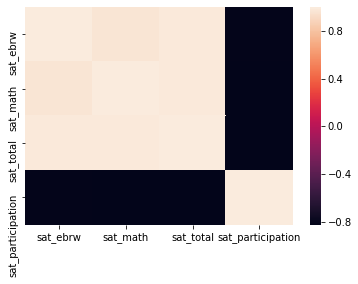

In [292]:
df_sat = df_combined[['sat_ebrw', 'sat_math', 'sat_total', 'sat_participation']]

sns.heatmap(df_sat.corr());

For SAT, the participation rate is negatively correlated to the sub-tests and total scores.

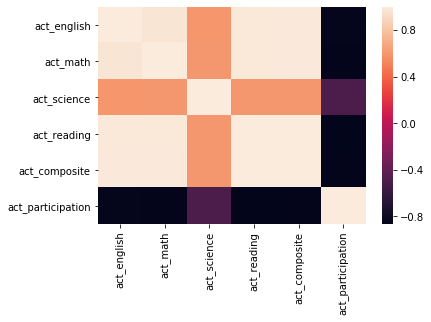

In [268]:
df_act = df_combined[['act_english', 'act_math', 'act_science', 'act_reading', 'act_composite' , 'act_participation']]

sns.heatmap(df_act.corr());

For ACT, the participation rate is negatively correlated to the sub-tests and composite scores.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [ ]:
# Code

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [ ]:
# Code

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [ ]:
# Code

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?